Unsupervised learning is a method of ML in which we don't know the y value(output).

K-Means is a method of clustering.IN which K is the number of cluster we are looking for. 

First step is to identify k random points which are called the centroid of our clustter

Next step is to compute/identify the distance of every point from the centroid and cluster them accordingly

Next adjust the centroids so that they become the center of gravity for a given clusster or in simple terms they cover maximum datapoints around them.

Recompute the clusters untill the points stop changing clusters

We use the elbow technique to fnd the best value for k

In unsupervised learning we observe the patern and find of similarities in the dataset and classify into clustters or categories

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
df=pd.read_csv("F:/Sem6 Project Prep/ML/files/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


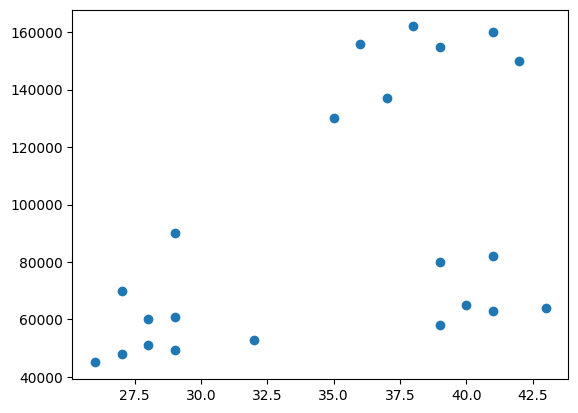

In [34]:
plt.scatter(df.Age,df["Income($)"])

In [35]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [36]:
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [37]:
df["cluster_no"]=y_pred
df.head()

,Name,Age,Income($),cluster_no
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


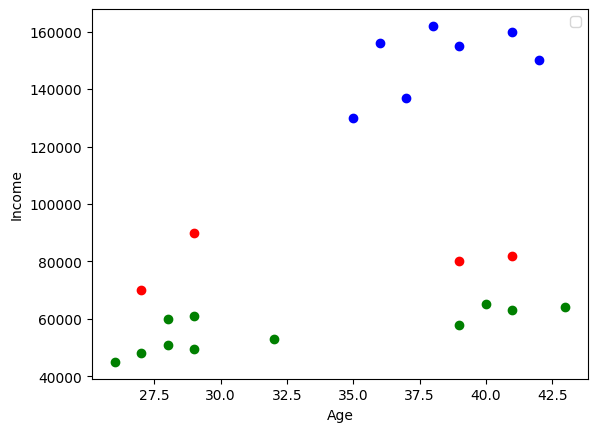

In [38]:
df0=df[df.cluster_no==0]
df1=df[df.cluster_no==1]
df2=df[df.cluster_no==2]

plt.scatter(df0.Age,df0["Income($)"],color="blue")
plt.scatter(df1.Age,df1["Income($)"],color="red")
plt.scatter(df2.Age,df2["Income($)"],color="green")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


As it is noticed above the green dots are little mismatched this is due to scalling error since there is a huge differnce in the scale of x and y axis.We use MinMaxScaler to solve this issue.

In [39]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df[["Income($)"]]=scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df[["Age"]]=scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster_no
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [40]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [41]:
df["cluster_no"]=y_pred
df

,Name,Age,Income($),cluster_no
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [44]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

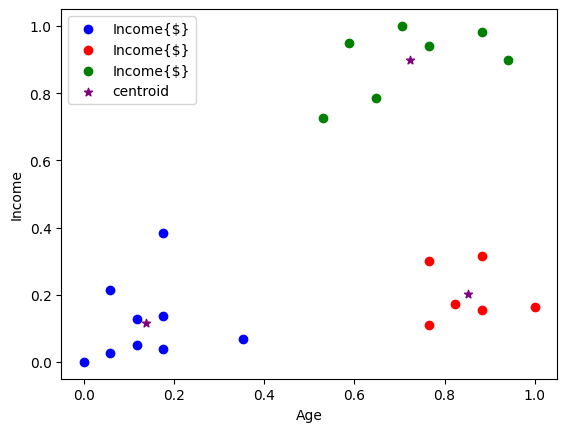

In [46]:
df0=df[df.cluster_no==0]
df1=df[df.cluster_no==1]
df2=df[df.cluster_no==2]

plt.scatter(df0.Age,df0["Income($)"],color="blue",label="Income{$}")
plt.scatter(df1.Age,df1["Income($)"],color="red",label="Income{$}")
plt.scatter(df2.Age,df2["Income($)"],color="green",label="Income{$}")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


How to determine how many clusters to consider when the data is huge-> use elbow plot method.

In elbow plot we first take a range of k valuesthen find the sum of squared error(sse)then ployt and find the suitable k value

In [47]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.2250859596222327,
 0.17681044133887713,
 0.13265419827245162,
 0.10938598377046613]

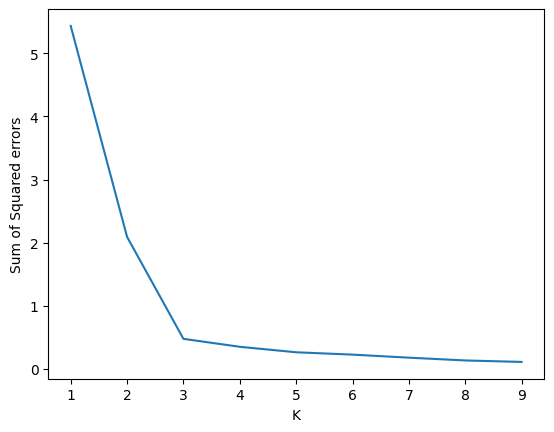

In [48]:
plt.xlabel("K")
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)